In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
ds=data.copy()

In [4]:
ds=ds.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [5]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## EDA

In [6]:
ds.shape

(891, 8)

In [7]:
ds.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [8]:
ds.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
ds.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
ds['Survived'].unique()

array([0, 1], dtype=int64)

In [12]:
ds['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
ds['Embarked'].unique()

array(['S', 'C', 'Q', nan, 'Q-'], dtype=object)

In [14]:
ds.loc[ds['Embarked']=='Q-']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
890,0,3,male,32.0,0,0,7.75,Q-


In [15]:
ds['Embarked']=ds['Embarked'].replace('Q-','Q')

In [16]:
ds['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
ds.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


### Univariate Analysis

In [18]:
ds1=ds.drop(['Sex','Embarked'],axis=1)  # separate the numerical and categorical columns so we can visualize them.
ds1

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [19]:
ds2=ds[['Sex','Embarked']].copy()

In [20]:
ds2

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


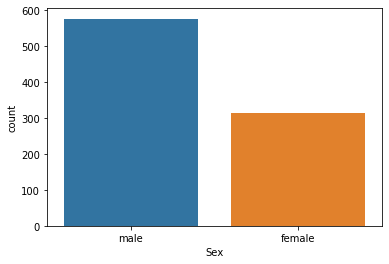

In [21]:
sns.countplot(x=ds2['Sex'],data=ds1)

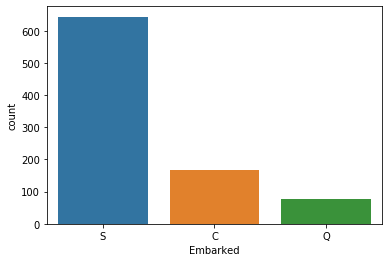

In [22]:
sns.countplot(x=ds2['Embarked'],data=ds1)

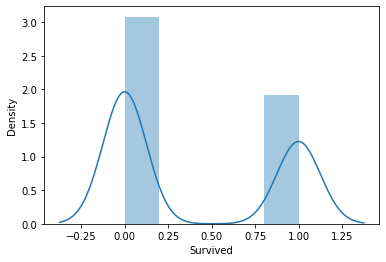

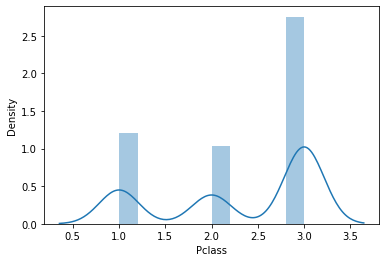

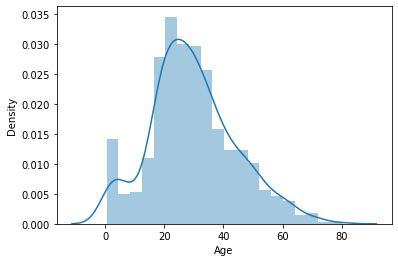

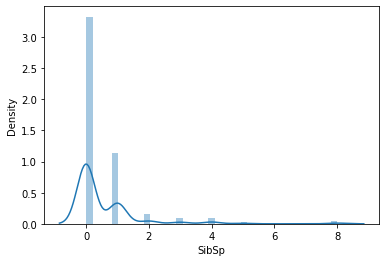

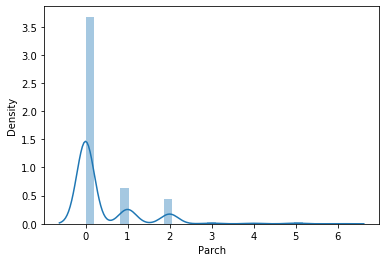

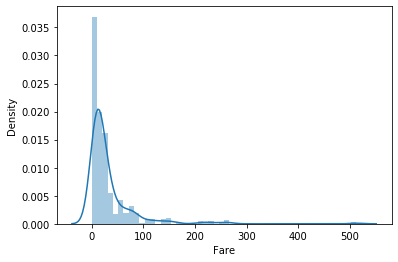

<Figure size 432x288 with 0 Axes>

In [23]:
for i in ds1.columns:
    sns.distplot(ds1[i])
    plt.figure()

### Bivariate Analysis

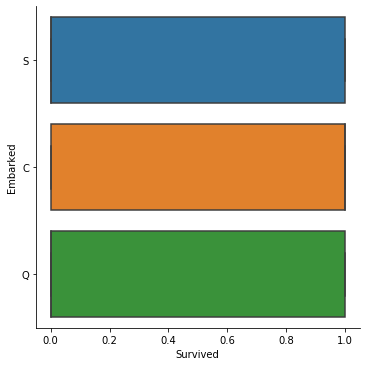

In [24]:
sns.catplot(data=ds,x='Survived',y='Embarked',kind='box')

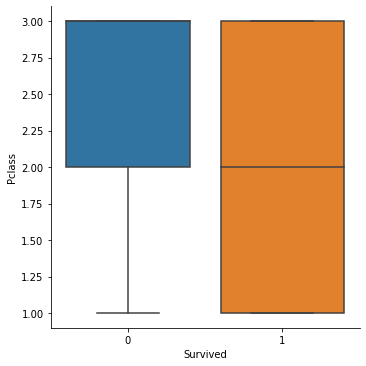

In [25]:
sns.catplot(data=ds,x='Survived',y='Pclass',kind='box')

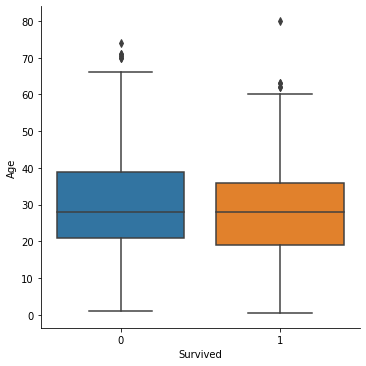

In [26]:
sns.catplot(data=ds,x='Survived',y='Age',kind='box')

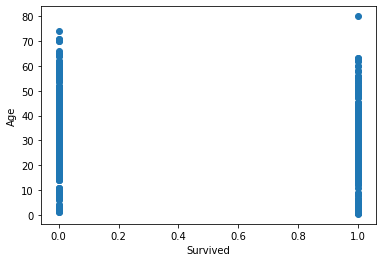

In [27]:
plt.scatter(ds['Survived'],ds['Age'])
plt.xlabel('Survived')
plt.ylabel("Age")
plt.show()

### Multivariate Analysis

In [28]:
ds.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Encoding of categorical columns

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
ds['Sex']=le.fit_transform(ds['Sex'])
ds['Embarked']=le.fit_transform(ds['Embarked'])

In [32]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [33]:
ds.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


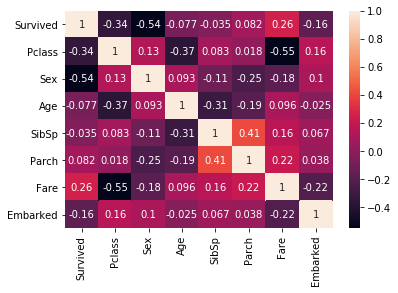

In [34]:
sns.heatmap(ds.corr(),annot=True)

#### Replacing of null values

In [35]:
ds['Age'].fillna(ds['Age'].median(),inplace=True)
ds['Embarked'].fillna(ds['Embarked'].mode(),inplace=True)

In [36]:
ds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Scaling of columns (Age and Fare) 

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sd=StandardScaler()

In [39]:
ds['Age']=sd.fit_transform(ds['Age'].values.reshape(-1,1))
ds['Fare']=sd.fit_transform(ds['Fare'].values.reshape(-1,1))

In [40]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.386671,2
887,1,1,0,-0.796286,0,0,-0.044381,2
888,0,3,0,-0.104637,1,2,-0.176263,2
889,1,1,1,-0.258337,0,0,-0.044381,0


In [41]:
dt=ds.copy()

### Checking for outliers

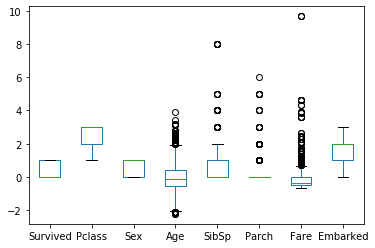

In [42]:
dt.plot.box()

### Removing outliers

In [43]:
from scipy.stats import zscore

z=np.abs(zscore(dt))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58111394],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.93846038],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58111394],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58111394],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.93846038],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67867322]])

In [44]:
dt=dt[(z<3).all(axis=1)]
dt.shape

(820, 8)

In [45]:
((891-820)/891)*100

7.968574635241302

### Checking for skewness

In [46]:
dt.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

In [47]:
from sklearn.preprocessing import PowerTransformer

In [48]:
list1=['SibSp','Parch','Fare']

pt=PowerTransformer(method='yeo-johnson',standardize=True)
for i in list1:
    dt[i]=pt.fit_transform(dt[i].values.reshape(-1,1))

In [49]:
dt.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       0.948944
Parch       1.581505
Fare        0.522154
Embarked   -1.257511
dtype: float64

In [50]:
list1=['SibSp','Parch','Fare']

pt=PowerTransformer(method='yeo-johnson',standardize=True)
for i in list1:
    dt[i]=pt.fit_transform(dt[i].values.reshape(-1,1))

In [51]:
dt.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       0.945773
Parch       1.581295
Fare        0.045415
Embarked   -1.257511
dtype: float64

### Spliting the data into train and test

In [52]:
x=dt.drop('Survived',axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.565736,1.573831,-0.484706,-1.015198,2
1,1,0,0.663861,1.573831,-0.484706,1.491086,0
2,3,0,-0.258337,-0.633798,-0.484706,-0.897627,2
3,1,0,0.433312,1.573831,-0.484706,1.359943,2
4,3,1,0.433312,-0.633798,-0.484706,-0.876454,2
...,...,...,...,...,...,...,...
886,2,1,-0.181487,-0.633798,-0.484706,-0.174866,2
887,1,0,-0.796286,-0.633798,-0.484706,0.930051,2
888,3,0,-0.104637,1.573831,2.063891,0.653387,2
889,1,1,-0.258337,-0.633798,-0.484706,0.930051,0


In [53]:
y=dt['Survived']

In [54]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

### Finding the best Random State

In [55]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.856353591160221  at random state 148


In [61]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=148)

In [62]:
x_train.shape

(639, 7)

In [63]:
y_train.shape

(639,)

In [64]:
x_test.shape

(181, 7)

In [65]:
y_test.shape

(181,)

### Model Training

In [66]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()

In [68]:
model=(lg,dtc,svc,knn,rfc,ad)

for i in model:
    print("Model",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('clasification_report',classification_report(y_test,pred))
    score=cross_val_score(i,x,y,cv=5)
    print(score.mean())

Model LogisticRegression()
accuracy_score 0.8066298342541437
confusion_matrix [[94 17]
 [18 52]]
clasification_report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       0.75      0.74      0.75        70

    accuracy                           0.81       181
   macro avg       0.80      0.79      0.80       181
weighted avg       0.81      0.81      0.81       181

0.7939024390243903
Model DecisionTreeClassifier()
accuracy_score 0.850828729281768
confusion_matrix [[99 12]
 [15 55]]
clasification_report               precision    recall  f1-score   support

           0       0.87      0.89      0.88       111
           1       0.82      0.79      0.80        70

    accuracy                           0.85       181
   macro avg       0.84      0.84      0.84       181
weighted avg       0.85      0.85      0.85       181

0.7695121951219511
Model SVC()
accuracy_score 0.8287292817679558
confusion_matrix [[97 1

### Hyper Parameter Tunning using GridSearchCV

In [72]:
# 1. FOR LOGISTIC REGRESSION

parameters={'C':np.arange(1,10),'penalty':['l1','l2','elasticnet']}
gs=GridSearchCV(lg,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [73]:
gs.best_params_

{'C': 1, 'penalty': 'l2'}

In [74]:
gs.best_score_

0.7965182086614173

In [75]:
# FOR DECISION TREE CLASSIFIER

parameters={'max_depth':np.arange(1,20),'criterion':['gini','entropy'],'splitter':['best','random'],
           'min_samples_leaf':np.arange(1,10),'min_samples_split':np.arange(1,10)}

gs=GridSearchCV(dtc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [76]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'random'}

In [77]:
gs.best_score_

0.8293922244094489

In [79]:
# FOR KNEIGHBORS CLASSIFIER

parameters={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'n_jobs':[-1]}

gs=GridSearchCV(knn,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [80]:
gs.best_params_

{'n_jobs': -1, 'n_neighbors': 4, 'weights': 'uniform'}

In [81]:
gs.best_score_

0.7839936023622047

In [82]:
# FOR RANDOM FOREST CLASSIFIER

parameterS={'n_estimators':(100,150,200,250),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

gs=GridSearchCV(rfc,parameterS,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200, 250)})

In [83]:
gs.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 250}

In [84]:
gs.best_score_

0.7933686023622047

In [87]:
# FOR SVC

parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1.0,10.0],'probability':[True],'gamma':['scale','auto']}

gs=GridSearchCV(svc,parameters,cv=5)
gs.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'probability': [True]})

In [88]:
gs.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}

In [89]:
gs.best_score_

0.8137057086614174

In [90]:
# FOR ADABOOST CLASSIFIER

parameters={'n_estimators':[50,100,150,200],'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'algorithm':['SAMME','SAMME.R']}
gs=GridSearchCV(ad,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200]})

In [91]:
gs.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

In [92]:
gs.best_score_

0.7949557086614173

### Again Model Training

In [96]:
svc=SVC(kernel='rbf',probability=True,C=1.0,gamma='scale')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predsvc))
print('confusion_matrix',confusion_matrix(y_test,predsvc))
print('clasification_report',classification_report(y_test,predsvc))

accuracy_score 0.8287292817679558
confusion_matrix [[97 14]
 [17 53]]
clasification_report               precision    recall  f1-score   support

           0       0.85      0.87      0.86       111
           1       0.79      0.76      0.77        70

    accuracy                           0.83       181
   macro avg       0.82      0.82      0.82       181
weighted avg       0.83      0.83      0.83       181



In [97]:
lg=LogisticRegression(C=1,penalty='l2')
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predlg))
print('confusion_matrix',confusion_matrix(y_test,predlg))
print('clasification_report',classification_report(y_test,predlg))

accuracy_score 0.8066298342541437
confusion_matrix [[94 17]
 [18 52]]
clasification_report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       0.75      0.74      0.75        70

    accuracy                           0.81       181
   macro avg       0.80      0.79      0.80       181
weighted avg       0.81      0.81      0.81       181



In [99]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=3,min_samples_split=5,splitter='random')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy_score',accuracy_score(y_test,preddt))
print('confusion_matrix',confusion_matrix(y_test,preddt))
print('clasification_report',classification_report(y_test,preddt))

accuracy_score 0.7624309392265194
confusion_matrix [[93 18]
 [25 45]]
clasification_report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       111
           1       0.71      0.64      0.68        70

    accuracy                           0.76       181
   macro avg       0.75      0.74      0.74       181
weighted avg       0.76      0.76      0.76       181



In [100]:
kn=KNeighborsClassifier(n_jobs=-1,n_neighbors=4,weights='uniform')
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predkn))
print('confusion_matrix',confusion_matrix(y_test,predkn))
print('clasification_report',classification_report(y_test,predkn))

accuracy_score 0.7955801104972375
confusion_matrix [[101  10]
 [ 27  43]]
clasification_report               precision    recall  f1-score   support

           0       0.79      0.91      0.85       111
           1       0.81      0.61      0.70        70

    accuracy                           0.80       181
   macro avg       0.80      0.76      0.77       181
weighted avg       0.80      0.80      0.79       181



In [102]:
rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=250)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('clasification_report',classification_report(y_test,predrf))

accuracy_score 0.850828729281768
confusion_matrix [[100  11]
 [ 16  54]]
clasification_report               precision    recall  f1-score   support

           0       0.86      0.90      0.88       111
           1       0.83      0.77      0.80        70

    accuracy                           0.85       181
   macro avg       0.85      0.84      0.84       181
weighted avg       0.85      0.85      0.85       181



In [103]:
ad=AdaBoostClassifier(algorithm='SAMME',learning_rate= 1.0,n_estimators=200)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predad))
print('confusion_matrix',confusion_matrix(y_test,predad))
print('clasification_report',classification_report(y_test,predad))

accuracy_score 0.8784530386740331
confusion_matrix [[97 14]
 [ 8 62]]
clasification_report               precision    recall  f1-score   support

           0       0.92      0.87      0.90       111
           1       0.82      0.89      0.85        70

    accuracy                           0.88       181
   macro avg       0.87      0.88      0.87       181
weighted avg       0.88      0.88      0.88       181



### AUC ROC CURVE AND SCORE

In [107]:
from sklearn.metrics import roc_auc_score,roc_curve,f1_score

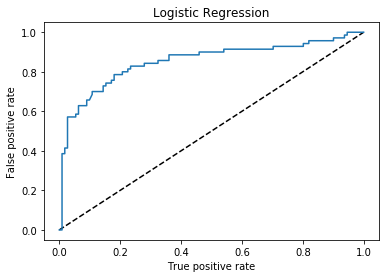

In [104]:
# FOR LOGISTIC REGRESSION

pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Logistic Regression')
plt.show()

In [105]:
auc_score=roc_auc_score(y_test,predlg)
auc_score

0.7948519948519949

In [108]:
print(f1_score(y_test,predlg))

0.748201438848921


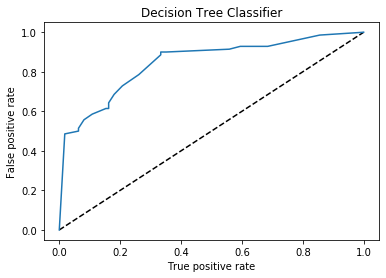

In [109]:
# FOR DECISION TREE CLASSIFIER

pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [110]:
auc_score=roc_auc_score(y_test,preddt)
auc_score

0.7403474903474904

In [111]:
print(f1_score(y_test,preddt))

0.6766917293233083


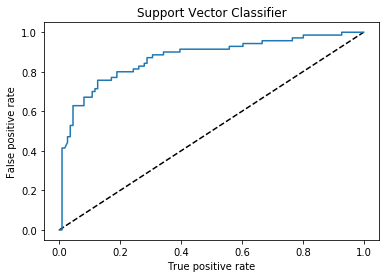

In [112]:
# FOR SVC

pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Support Vector Classifier')
plt.show()

In [113]:
auc_score=roc_auc_score(y_test,predsvc)
auc_score

0.8155083655083654

In [114]:
print(f1_score(y_test,predsvc))

0.7737226277372262


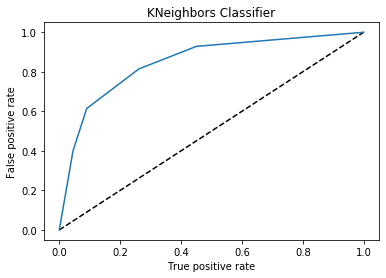

In [115]:
# FOR KNEIGHBORS CLASSIFIER

pred_prob=kn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('KNeighbors Classifier')
plt.show()

In [116]:
auc_score=roc_auc_score(y_test,predkn)
auc_score

0.7620978120978121

In [117]:
print(f1_score(y_test,predkn))

0.6991869918699187


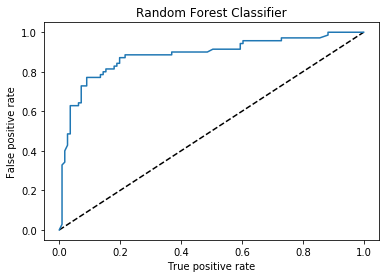

In [118]:
# RANDOM FOREST CLASSIFIER

pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [119]:
auc_score=roc_auc_score(y_test,predrf)
auc_score

0.8361647361647361

In [120]:
print(f1_score(y_test,predrf))

0.8


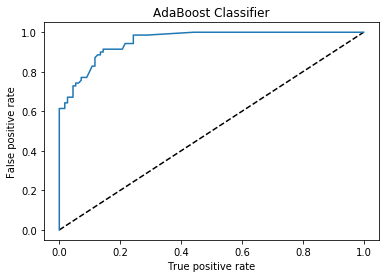

In [121]:
# ADABOOST CLASSIFIER

pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [122]:
auc_score=roc_auc_score(y_test,predad)
auc_score

0.8797940797940798

In [123]:
print(f1_score(y_test,predad))

0.8493150684931505


### Final Model

In [124]:
ad=AdaBoostClassifier(algorithm='SAMME',learning_rate= 1.0,n_estimators=200)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print(f1_score(y_test,predad))

0.8493150684931505


### Saving the Final Model

In [125]:
import joblib

In [126]:
joblib.dump(ad,'titanic_ad.obj')

['titanic_ad.obj']